# Ransomware Data Analysis

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
# Load the dataset
data_path = "Ransomware 2025.csv"
df = pd.read_csv(data_path)

df.head(5)

,Target,AKA,description,sector,org size,revenue USD million,cost,ransom cost,data note,ransom paid,...,revenue as of,no of employees,Data Note,Source Name,URL,URL 2,URL 3,URL 4,URL 5,ID
0,Kaseya,NaN,NaN,tech,300,300.0,70,70.0,NaN,unknown,...,NaN,NaN,NaN,NaN,https://techcrunch.com/2021/07/05/kaseya-hack-...,NaN,NaN,NaN,NaN,359
1,Salvation Army,NaN,NaN,NaN,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.teiss.co.uk/salvation-army-ransomw...,NaN,NaN,NaN,NaN,358
2,Grupo Fleury,NaN,Brazil's largest diagnostic company,healthcare,10,686.0,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.bleepingcomputer.com/news/security...,NaN,NaN,NaN,NaN,357
3,City of Liege,NaN,NaN,government,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://securityaffairs.co/wordpress/119240/ma...,NaN,NaN,NaN,NaN,356
4,Lucky Star Casino,NaN,NaN,NaN,1,9.0,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.casino.org/news/lucky-star-casinos...,NaN,NaN,NaN,NaN,355


## Data Preprocessing and Cleaning

In [5]:
# Remove columns with >80% missing values
df_cleaned = df.drop(columns=[col for col in df.columns if df[col].isnull().mean() > 0.8])

# Standardize column names
df_cleaned.columns = [col.strip().lower().replace(' ', '_') for col in df_cleaned.columns]

df.head(5)

,Target,AKA,description,sector,org size,revenue USD million,cost,ransom cost,data note,ransom paid,...,revenue as of,no of employees,Data Note,Source Name,URL,URL 2,URL 3,URL 4,URL 5,ID
0,Kaseya,NaN,NaN,tech,300,300.0,70,70.0,NaN,unknown,...,NaN,NaN,NaN,NaN,https://techcrunch.com/2021/07/05/kaseya-hack-...,NaN,NaN,NaN,NaN,359
1,Salvation Army,NaN,NaN,NaN,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.teiss.co.uk/salvation-army-ransomw...,NaN,NaN,NaN,NaN,358
2,Grupo Fleury,NaN,Brazil's largest diagnostic company,healthcare,10,686.0,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.bleepingcomputer.com/news/security...,NaN,NaN,NaN,NaN,357
3,City of Liege,NaN,NaN,government,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://securityaffairs.co/wordpress/119240/ma...,NaN,NaN,NaN,NaN,356
4,Lucky Star Casino,NaN,NaN,NaN,1,9.0,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.casino.org/news/lucky-star-casinos...,NaN,NaN,NaN,NaN,355


### Fill missing values for categorical and numerical columns

In [7]:
# Fill missing values for categorical and numerical columns
df_cleaned['sector'] = df_cleaned['sector'].fillna('Unknown')
df_cleaned['ransom_paid'] = df_cleaned['ransom_paid'].str.lower().fillna('unknown')
df_cleaned['location'] = df_cleaned['location'].fillna('Unknown')

### Handle 'ransom_cost' and 'revenue_usd_million' columns

In [9]:
# Handle 'ransom_cost' and 'revenue_usd_million' columns
df_cleaned['ransom_cost'] = pd.to_numeric(df_cleaned['ransom_cost'], errors='coerce').fillna(0)
df_cleaned['revenue_usd_million'] = pd.to_numeric(df_cleaned['revenue_usd_million'], errors='coerce').fillna(
    df_cleaned['revenue_usd_million'].mean()
)

### Clean the 'cost' column and fill missing values in 'cost' with the median

In [11]:
# Clean the 'cost' column
df_cleaned['cost'] = df_cleaned['cost'].replace(['', 'unknown'], np.nan)  # Replace empty strings and 'unknown' with NaN
df_cleaned['cost'] = df_cleaned['cost'].str.extract(r'(\d+\.?\d*)')[0]  # Extract numeric values or parts of strings
df_cleaned['cost'] = pd.to_numeric(df_cleaned['cost'], errors='coerce')  # Convert to numeric, replacing invalid entries with NaN

# Fill missing values in 'cost' with the median
df_cleaned['cost'] = df_cleaned['cost'].fillna(df_cleaned['cost'].median())

### Convert categorical columns to proper data types

In [13]:
# Convert categorical columns to proper data types
df_cleaned['sector'] = df_cleaned['sector'].astype('category')
df_cleaned['ransom_paid'] = df_cleaned['ransom_paid'].astype('category')

### Encode categorical location column for analysis if needed

In [15]:
# Encode categorical location column for analysis if needed
le = LabelEncoder()
df_cleaned['location_encoded'] = le.fit_transform(df_cleaned['location'])

### Cleaning 'sector column'

In [17]:
# Define a dictionary to map incorrect sector names to the correct ones
sector_corrections = {
    "finace": "finance",
    "telecoms": "telecomms",
    "healthcare, tech": "tech",
    "logistics, telecoms": "telecomms"
}

# Replace incorrect sector names with correct ones
df_cleaned['sector'] = df_cleaned['sector'].replace(sector_corrections)

# Verify the corrections
print(df_cleaned['sector'].value_counts())

# Strip whitespace and convert all sector values to lowercase
df_cleaned['sector'] = df_cleaned['sector'].str.strip().str.lower()

# Apply the corrections
df_cleaned['sector'] = df_cleaned['sector'].replace(sector_corrections)

# Capitalize each word for a cleaner presentation
df_cleaned['sector'] = df_cleaned['sector'].str.title()

# Verify the cleaned sector column
print(df_cleaned['sector'].unique())

sector
government         59
tech               58
healthcare         50
academic           39
logistics          22
finance            19
transport          15
energy             15
retail             13
food & beverage     9
media & sports      9
mixed               8
telecomms           8
legal               7
misc                7
Unknown             7
automotive          5
gaming              4
military            2
media               1
tech                1
Name: count, dtype: int64
['Tech' 'Unknown' 'Healthcare' 'Government' 'Academic' 'Energy'
 'Transport' 'Misc' 'Finance' 'Retail' 'Gaming' 'Logistics' 'Media'
 'Food & Beverage' 'Legal' 'Media & Sports' 'Telecomms' 'Automotive'
 'Military' 'Mixed']


### Define a dictionary to map incorrect ransom paid status names to the correct ones

In [19]:
# Define a dictionary to map incorrect ransom paid status names to the correct ones
sector_ransom_paid_corrections = {
    "no": "refused",
}

# Replace incorrect ransom paid status names to the correct ones
df_cleaned['ransom_paid'] = df_cleaned['ransom_paid'].replace(sector_ransom_paid_corrections)

# Verify the corrections
print(df_cleaned['ransom_paid'].value_counts())

ransom_paid
unknown        266
refused         61
ransom paid     31
Name: count, dtype: int64


## Visualizations

### Most Affected Sectors

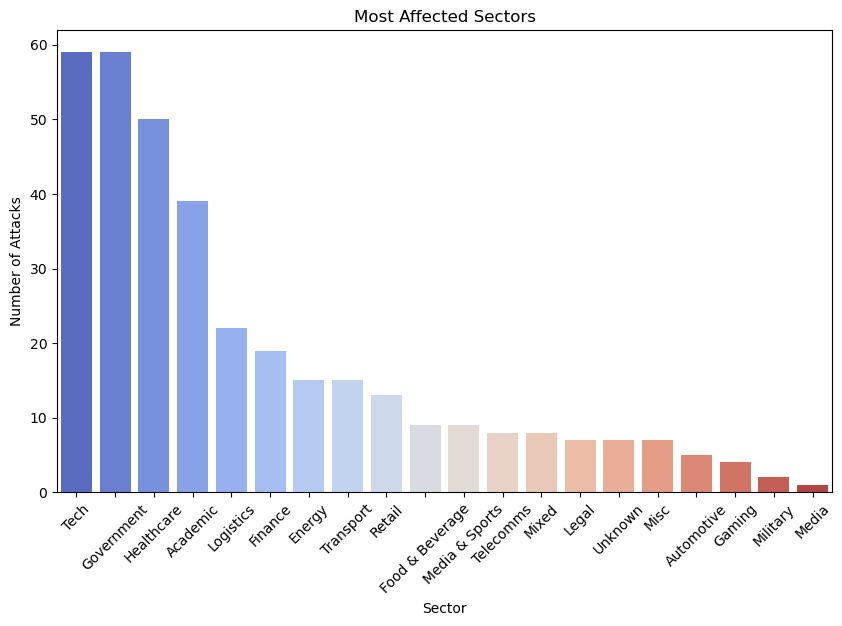

In [22]:
# Visualization 1: Most Affected Sectors
plt.figure(figsize=(10, 6))
sector_counts = df_cleaned['sector'].value_counts()
sns.barplot(x=sector_counts.index, y=sector_counts.values, palette='coolwarm')
plt.title('Most Affected Sectors')
plt.xlabel('Sector')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()


### Average cost by sector

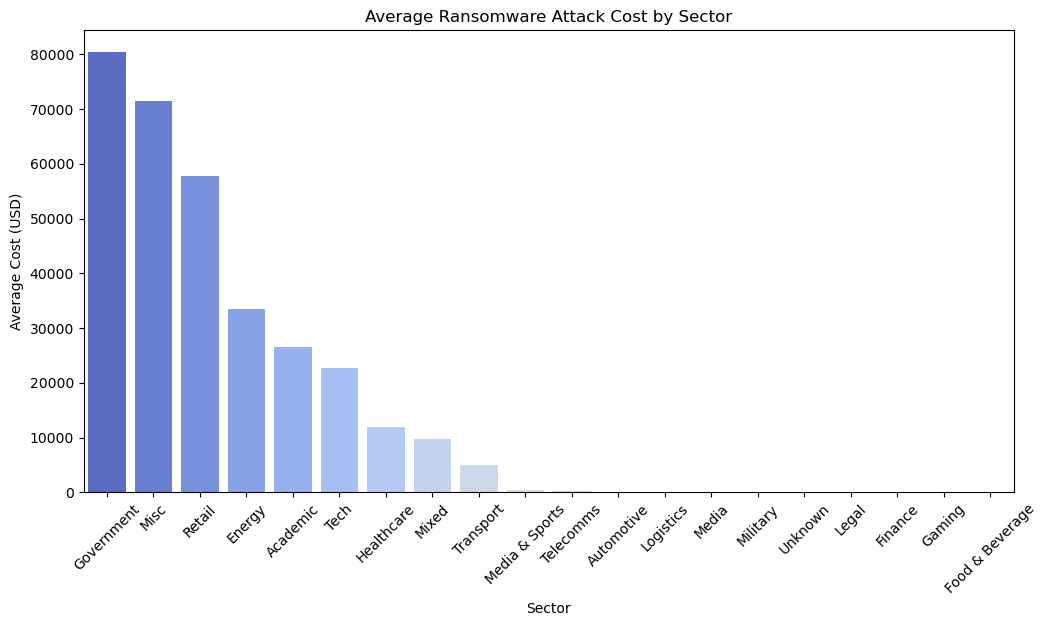

In [24]:
# Average cost by sector
plt.figure(figsize=(12, 6))
sector_cost = df_cleaned.groupby('sector')['cost'].mean().sort_values(ascending=False)
sns.barplot(x=sector_cost.index, y=sector_cost.values, palette='coolwarm')
plt.title('Average Ransomware Attack Cost by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Cost (USD)')
plt.xticks(rotation=45)
plt.show()

### Ransom paid status by sector

<Figure size 1200x800 with 0 Axes>

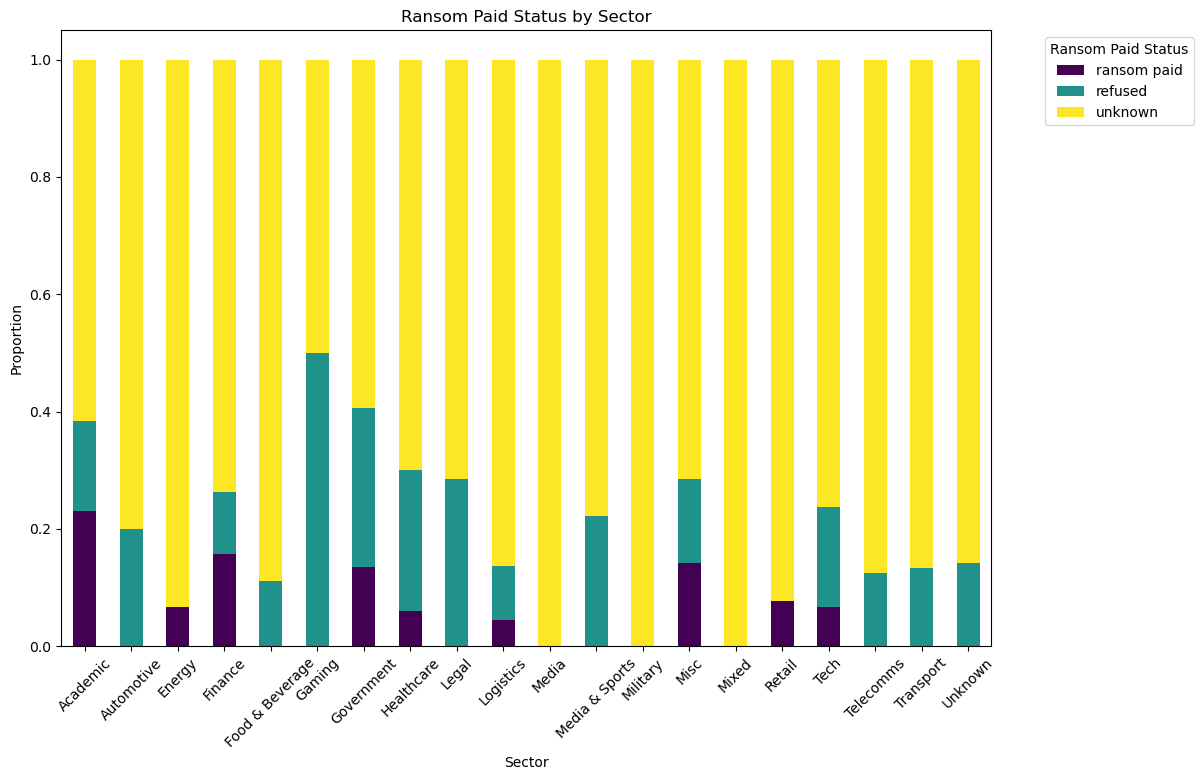

In [26]:
# Ransom paid status by sector
plt.figure(figsize=(12, 8))
sector_ransom_paid = df_cleaned.groupby('sector')['ransom_paid'].value_counts(normalize=True).unstack().fillna(0)
sector_ransom_paid.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Ransom Paid Status by Sector')
plt.xlabel('Sector')
plt.ylabel('Proportion')
plt.legend(title='Ransom Paid Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

### Relationship Between Ransom Cost, Revenue, and Ransom Paid

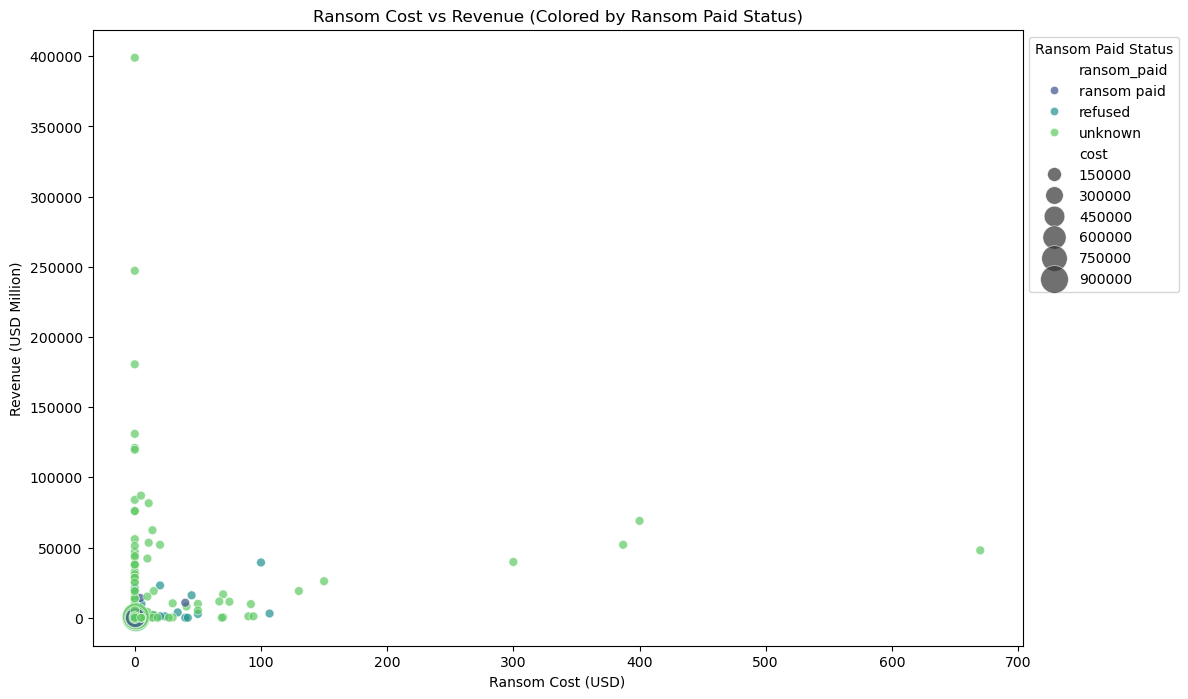

In [28]:
# Relationship Between Ransom Cost, Revenue, and Ransom Paid
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_cleaned,
    x='ransom_cost',
    y='revenue_usd_million',
    hue='ransom_paid',
    size='cost',
    sizes=(40, 400),
    alpha=0.7,
    palette='viridis'
)
plt.title('Ransom Cost vs Revenue (Colored by Ransom Paid Status)')
plt.xlabel('Ransom Cost (USD)')
plt.ylabel('Revenue (USD Million)')
plt.legend(title='Ransom Paid Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Attack Locations

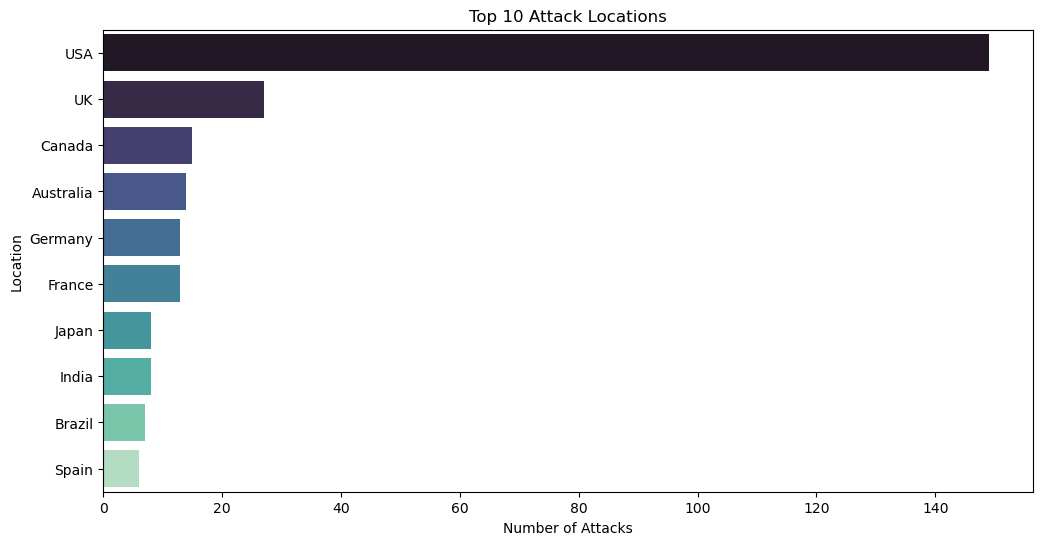

In [30]:
# Attack Locations
plt.figure(figsize=(12, 6))
location_counts = df_cleaned['location'].value_counts().head(10)  # Top 10 locations
sns.barplot(x=location_counts.values, y=location_counts.index, palette='mako')
plt.title('Top 10 Attack Locations')
plt.xlabel('Number of Attacks')
plt.ylabel('Location')
plt.show()

### Percentage of Ransom Paid, Refused, or Unknown

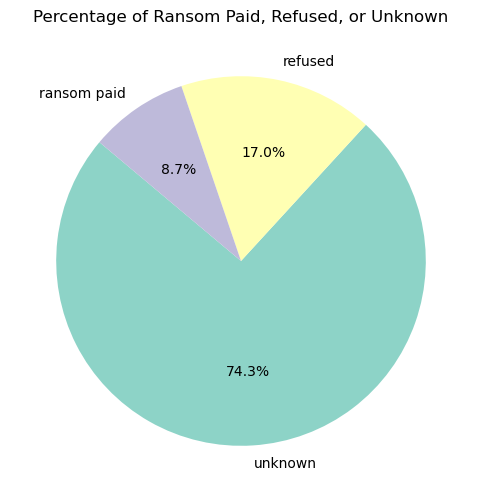

In [32]:
# Percentage of Ransom Paid, Refused, or Unknown
ransom_paid_percentages = df_cleaned['ransom_paid'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
ransom_paid_percentages.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Percentage of Ransom Paid, Refused, or Unknown')
plt.ylabel('')
plt.show()

### Trend of ransomware attacks over years

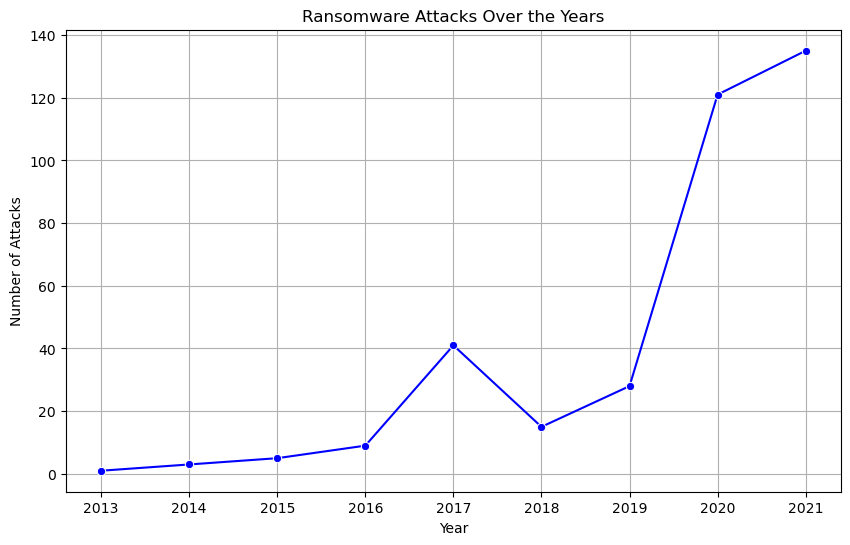

In [34]:
# Trend of ransomware attacks over years
plt.figure(figsize=(10, 6))
yearly_trend = df_cleaned['year'].value_counts().sort_index()
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o', color='b')
plt.title('Ransomware Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()

### Heatmap of correlations

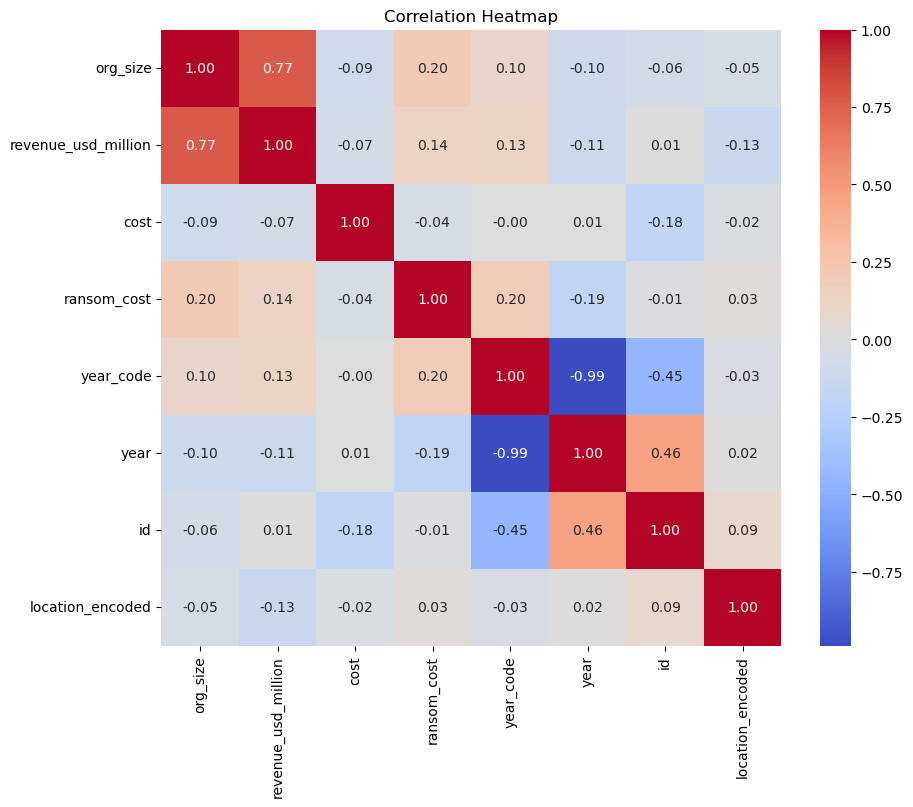

In [36]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
sns.heatmap(df_cleaned[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Organization size distribution of attacks

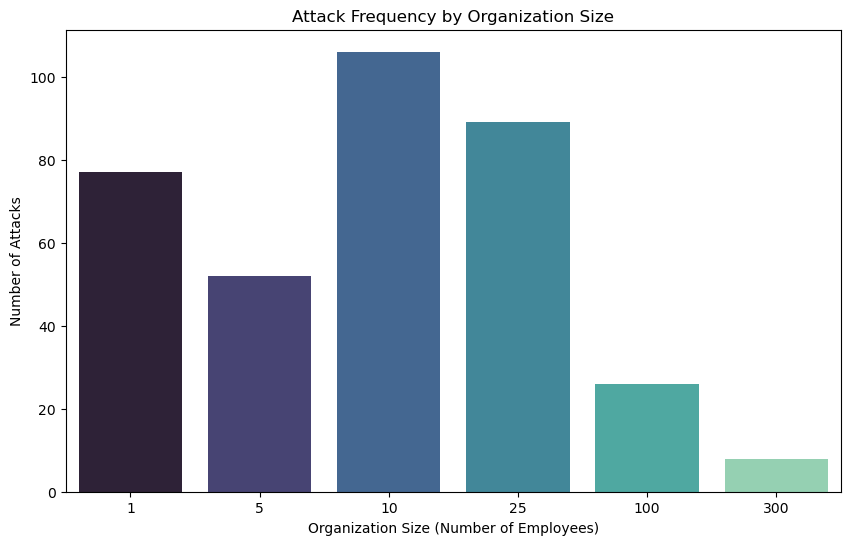

In [38]:
# Organization size distribution of attacks
plt.figure(figsize=(10, 6))
org_size_counts = df_cleaned['org_size'].value_counts().sort_index()
sns.barplot(x=org_size_counts.index, y=org_size_counts.values, palette='mako')
plt.title('Attack Frequency by Organization Size')
plt.xlabel('Organization Size (Number of Employees)')
plt.ylabel('Number of Attacks')
plt.show()

# Pairplot for numerical relationships

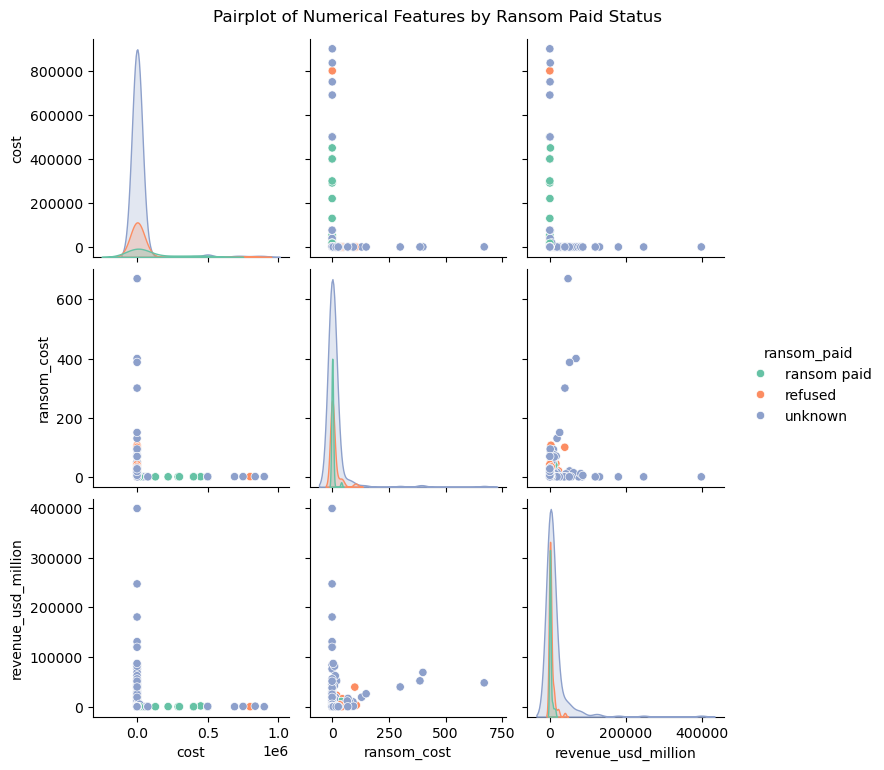

In [40]:
# Pairplot for numerical relationships
sns.pairplot(
    df_cleaned,
    vars=['cost', 'ransom_cost', 'revenue_usd_million'],
    hue='ransom_paid',
    palette='Set2',
    diag_kind='kde'
)
plt.suptitle('Pairplot of Numerical Features by Ransom Paid Status', y=1.02)
plt.show()

### Top ransomware groups

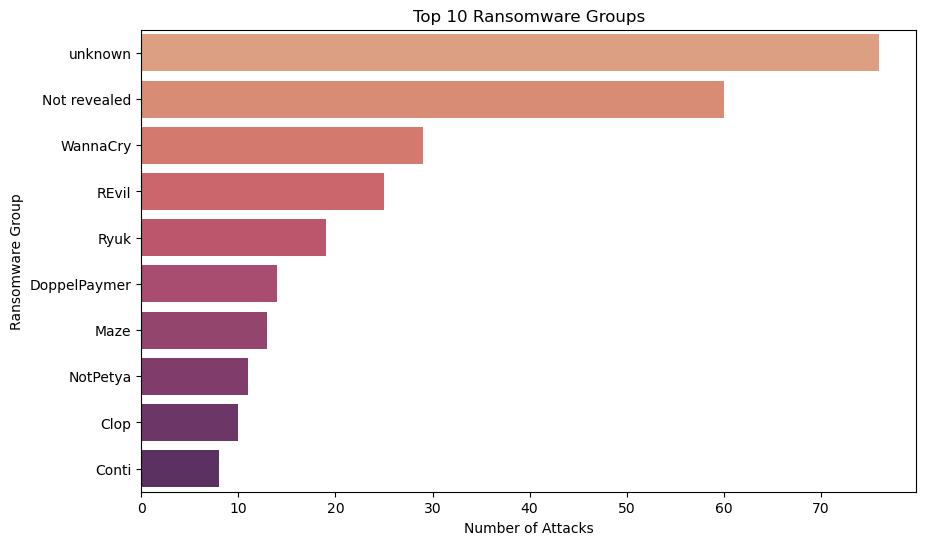

In [42]:
# Top ransomware groups
plt.figure(figsize=(10, 6))
top_attackers = df_cleaned['ransomware'].value_counts().head(10)
sns.barplot(x=top_attackers.values, y=top_attackers.index, palette='flare')
plt.title('Top 10 Ransomware Groups')
plt.xlabel('Number of Attacks')
plt.ylabel('Ransomware Group')
plt.show()

Dataset Link [Here](https://www.kaggle.com/datasets/joebeachcapital/ransomware-attacks/data)